In [29]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
pd.set_option('display.max_rows', None)

In [30]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


checking for missing data

In [31]:
for col in df.columns:
    null_count = df[col].isnull().value_counts()
    print(null_count)

False    7668
Name: name, dtype: int64
False    7591
True       77
Name: rating, dtype: int64
False    7668
Name: genre, dtype: int64
False    7668
Name: year, dtype: int64
False    7666
True        2
Name: released, dtype: int64
False    7665
True        3
Name: score, dtype: int64
False    7665
True        3
Name: votes, dtype: int64
False    7668
Name: director, dtype: int64
False    7665
True        3
Name: writer, dtype: int64
False    7667
True        1
Name: star, dtype: int64
False    7665
True        3
Name: country, dtype: int64
False    5497
True     2171
Name: budget, dtype: int64
False    7479
True      189
Name: gross, dtype: int64
False    7651
True       17
Name: company, dtype: int64
False    7664
True        4
Name: runtime, dtype: int64


removing rows with null values

In [32]:
df = df.dropna()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:
for col in df.columns:
    null_count = df[col].isnull().value_counts()
    print(null_count)

False    5421
Name: name, dtype: int64
False    5421
Name: rating, dtype: int64
False    5421
Name: genre, dtype: int64
False    5421
Name: year, dtype: int64
False    5421
Name: released, dtype: int64
False    5421
Name: score, dtype: int64
False    5421
Name: votes, dtype: int64
False    5421
Name: director, dtype: int64
False    5421
Name: writer, dtype: int64
False    5421
Name: star, dtype: int64
False    5421
Name: country, dtype: int64
False    5421
Name: budget, dtype: int64
False    5421
Name: gross, dtype: int64
False    5421
Name: company, dtype: int64
False    5421
Name: runtime, dtype: int64


changing column data types to appropriate ones

In [34]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [35]:
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


splitting and changing the format of the released column

In [36]:
split = df['released'].str.split('(', expand=True)
split = split.drop(columns=1)
df['released'] = split

In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [38]:
df['released'] = pd.to_datetime(df['released'])
df.dtypes

name                object
rating              object
genre               object
year                 int64
released    datetime64[ns]
score              float64
votes                int64
director            object
writer              object
star                object
country             object
budget               int64
gross                int64
company             object
runtime            float64
dtype: object

In [39]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


updating year column to match year of release

In [40]:
df['year'] = pd.DatetimeIndex(df['released']).year
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [41]:
df.dtypes

name                object
rating              object
genre               object
year                 int64
released    datetime64[ns]
score              float64
votes                int64
director            object
writer              object
star                object
country             object
budget               int64
gross                int64
company             object
runtime            float64
dtype: object

sorting to check for highest grossing  movie

In [42]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


checking for and dropping duplicates (if needed)

In [43]:
df.duplicated().value_counts()

False    5421
dtype: int64

In [45]:
df = df.drop_duplicates()
df = df.sort_values(by='gross', ascending=False).reset_index()
df.drop(columns='index', inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
1,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
2,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
4,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [46]:
df['company'].sort_values().value_counts()

Universal Pictures                                                 330
Columbia Pictures                                                  302
Warner Bros.                                                       298
Paramount Pictures                                                 279
Twentieth Century Fox                                              209
New Line Cinema                                                    155
Walt Disney Pictures                                               107
Touchstone Pictures                                                105
Metro-Goldwyn-Mayer (MGM)                                           99
Dreamworks Pictures                                                 75
TriStar Pictures                                                    75
Miramax                                                             66
Fox 2000 Pictures                                                   58
Summit Entertainment                                                57
Screen

Finding correlations and visualizing them

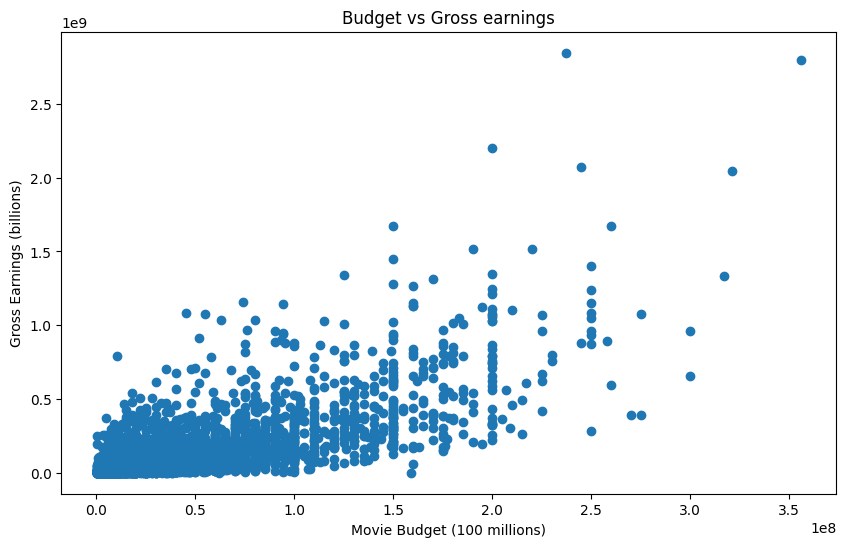

In [47]:
# correlation between budget and gross

# sns.scatterplot(data=df, x='budget', y='gross')
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Movie Budget (100 millions)')
plt.ylabel('Gross Earnings (billions)')
plt.show()

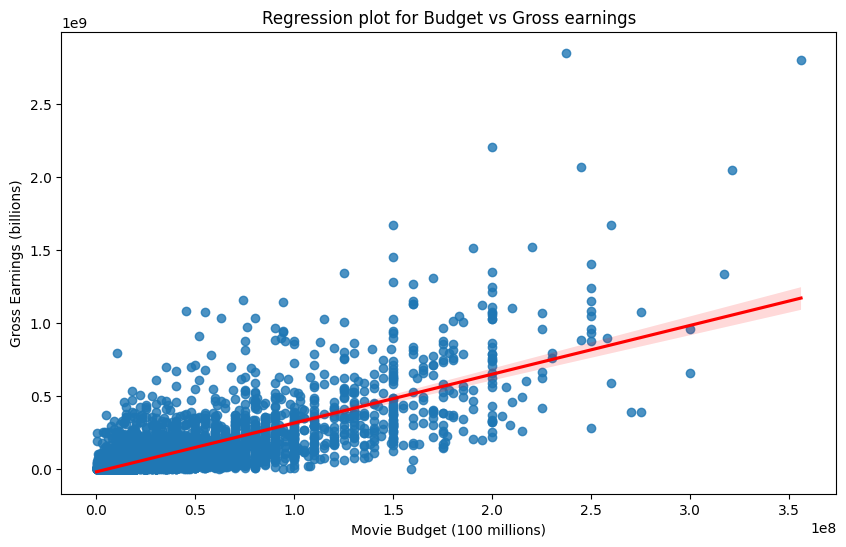

In [48]:
sns.regplot(data=df, x='budget', y='gross', line_kws={'color':'red'})
plt.title('Regression plot for Budget vs Gross earnings')
plt.xlabel('Movie Budget (100 millions)')
plt.ylabel('Gross Earnings (billions)')
plt.show()

In [49]:
# there are a couple correlation methods that can be used

df.corr()

C:\Users\youse\AppData\Local\Temp\ipykernel_16436\2620407105.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


C:\Users\youse\AppData\Local\Temp\ipykernel_16436\892676265.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)))


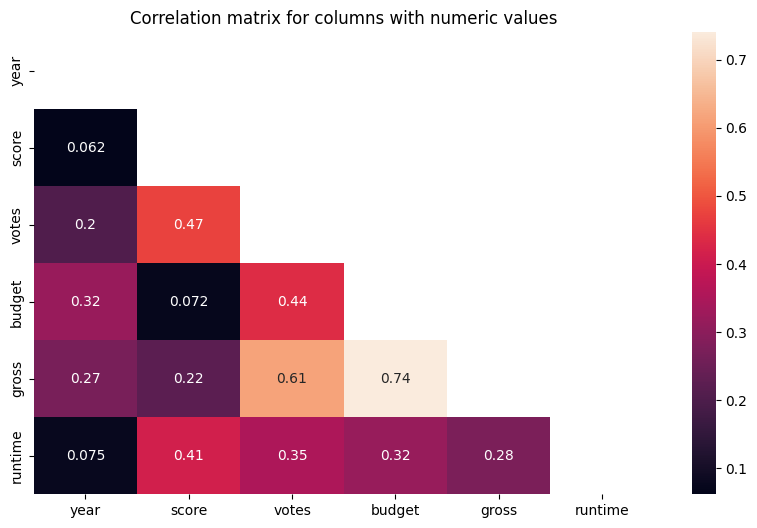

In [50]:
sns.heatmap(data=df.corr(), annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)))
plt.title("Correlation matrix for columns with numeric values")
plt.show()

categorizing the company column into numbers in order to use it for correlations

In [51]:
df_numeric = df.copy()
df_numeric['released'] = df_numeric['released'].astype('object')
for col in df_numeric.columns:
    if (df_numeric[col].dtype == 'object'):
        df_numeric[col] = df_numeric[col].astype('category')
        df_numeric[col] = df_numeric[col].cat.codes
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,386,5,0,2009,1703,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
1,388,5,0,2019,2339,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
2,4909,5,6,1997,936,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
3,3643,5,0,2015,2128,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
4,389,5,0,2018,2271,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


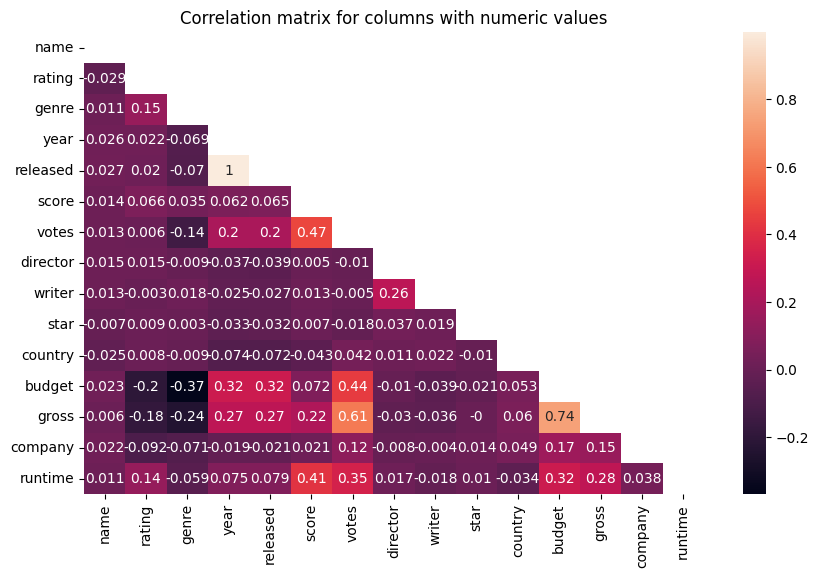

In [52]:
sns.heatmap(data=df_numeric.corr().round(3), annot=True, mask=np.triu(np.ones_like(df_numeric.corr(), dtype=bool)))
plt.title("Correlation matrix for columns with numeric values")
plt.show()

In [53]:
corr_pairs = df_numeric.corr().unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)

In [54]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
released  year        0.998532
year      released    0.998532
budget    gross       0.740247
gross     budget      0.740247
          votes       0.614751
votes     gross       0.614751
dtype: float64

another correlation can be found between votes and gross

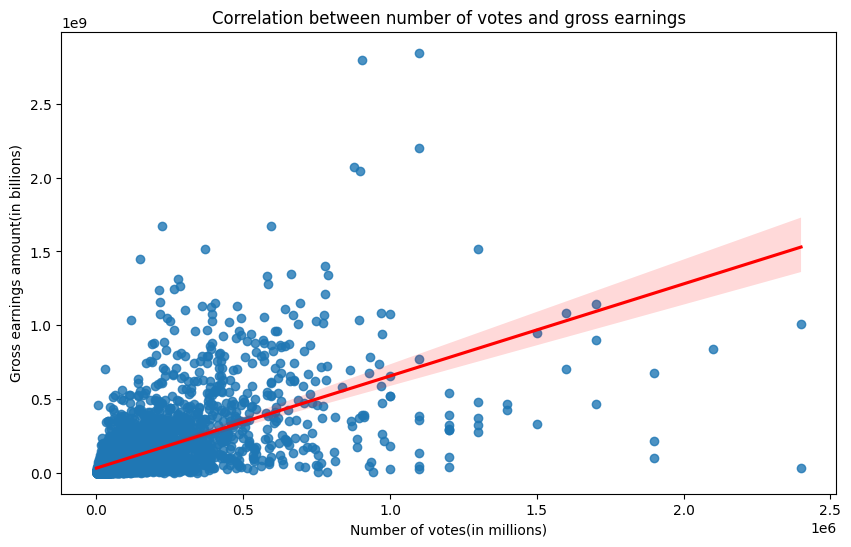

In [55]:
sns.regplot(data=df_numeric, x='votes', y='gross', line_kws={'color':'red'})
plt.title('Correlation between number of votes and gross earnings')
plt.xlabel('Number of votes(in millions)')
plt.ylabel('Gross earnings amount(in billions)')
plt.show()